<font color='blue'> **11 __________________________________ Parametric_Distributions** </font> 

In [1]:
import os ; from pathlib import Path ; import numpy as np; import pandas as pd;import matplotlib.pyplot as plt; from scipy import stats;import math ; import geostatspy.GSLIB as GSLIB
TA = Path("TA")   ; TA.mkdir(exist_ok=True);  import csv    ; REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Beta')

[0.   1.25 2.5  3.75 5.  ] ___ [0. 1. 2. 3. 4. 5.]


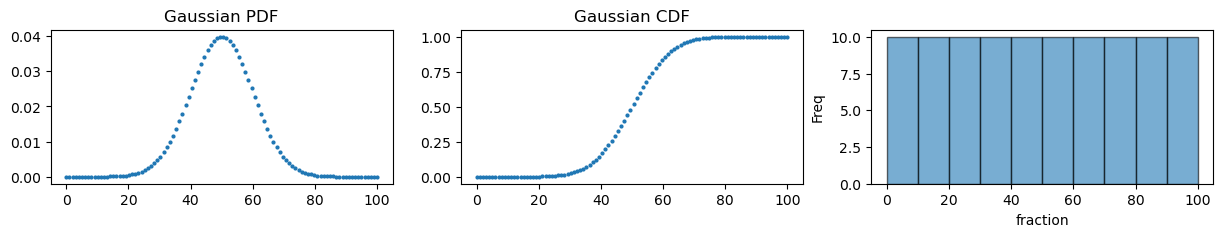

In [2]:
xvals= np.linspace(0.0,100.0,100)      ;zmin = 5   ;zmax= 50    ;pdf=stats.uniform.pdf(xvals, loc = zmin, scale = zmax-zmin)  ;cdf=stats.uniform.cdf(xvals,loc=zmin,scale=zmax-zmin)
xvals= np.linspace(0,101,102)          ;zn=50      ;zp = 0.5    ;pdf=stats.binom.pmf(xvals, zn, zp)                           ;cdf=stats.binom.cdf(xvals,zn,zp) 
n = 98 ;xvals = np.linspace(0,n+1,n+2) ;zlambda=5               ;pdf=stats.poisson.pmf(xvals, zlambda)                        ;cdf=stats.poisson.cdf(xvals,zlambda) 
xvals= np.linspace(0.0 ,100.0 ,100)    ;zmean=50  ;zstdev = 10  ;pdf=stats.norm.pdf(xvals, loc = zmean, scale = zstdev)       ;cdf=stats.norm.cdf(xvals,loc=zmean,scale=zstdev)
#xvals= np.linspace(0.0 ,100.0 ,100)   ;zmu = 5   ;zsigma = 1.5 ;pdf=stats.lognorm.pdf(xvals,s=zsigma,scale=math.exp(zmu))    ;cdf=stats.lognorm.cdf(xvals,s=zsigma,scale=math.exp(zmu))

fig = plt.figure(figsize=(15,2))                                        
plt.subplot(131)  ; plt.plot(xvals,pdf,'o',markersize=2) ; plt.title("Gaussian PDF") ; plt.tick_params(which='minor', length=4)
plt.subplot(132)  ; plt.plot(xvals,cdf,'o',markersize=2) ; plt.title("Gaussian CDF") ; 
plt.subplot(133)  ; plt.hist(xvals  ,alpha=0.6,edgecolor='black')   ;plt.xlabel('fraction'); plt.ylabel('Freq')  ; plt.plot()      ;print(np.linspace(0,5,5), '___',np.linspace(0,5,6))

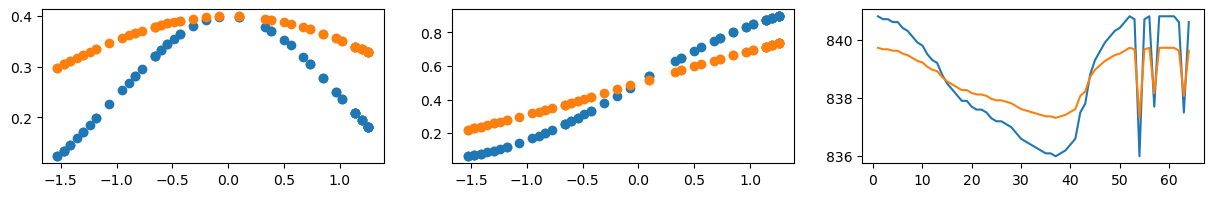

,NN,MED,MOD,SEL,Z,PDF,CDF,Z2,pdf2,cdf2,RES__
0,1,840.8,840.9484,840.8,1.254117,0.18171,0.895100,0.627059,0.327738,0.734690,839.71875
1,2,840.7,840.9478,840.7,1.196123,0.19509,0.884176,0.598062,0.333612,0.725101,839.66875


In [3]:
PD = pd.read_csv(REF1/'MED_MOD.csv')                       ; PD['SEL']  = PD['MED']
n='n'                                   ; MD=0 ; ST=1      ; PD['Z']=((PD['SEL'] -PD['SEL'].mean()) /np.std(PD['SEL']*ST,ddof=0))+MD
PD['PDF'] = stats.norm.pdf(PD['Z'],loc=0,scale=1)          ; PD['CDF'] = stats.norm.cdf(PD['Z'],loc=0,scale=1)

MD=0 ; ST=2   ; PD['Z2']=((PD['SEL']-PD['SEL'].mean())/np.std(PD['SEL']*ST,ddof=0))+MD  ;PD['pdf2']=stats.norm.pdf(PD['Z2'],loc=0,scale=1) ;PD['cdf2']=stats.norm.cdf(PD['Z2'],loc=0,scale=1)
n='n'                                                     ; PD['RES__'] = ((PD['Z2'] * np.std(PD['SEL']+MD,ddof=0)))+PD['SEL'].mean() 

fig = plt.figure(figsize=(15,2))  
plt.subplot(131) ; plt.scatter(PD['Z'], PD['PDF']) ; plt.subplot(132) ; plt.scatter(PD['Z'], PD['CDF'])
plt.subplot(131) ; plt.scatter(PD['Z'], PD['pdf2']) ; plt.subplot(132) ; plt.scatter(PD['Z'], PD['cdf2']) 
plt.subplot(133) ; plt.plot(PD[['NN']], PD[['SEL','RES__']]); plt.show()  ; PD.head(2)

#PD['DIF']=PD['MOD']-PD['MED']                              ; PD['Zdif']= (PD['DIF'] -PD['DIF'].mean()) /np.std(PD['DIF']   ,ddof=0)
#PD['PDFzDIF']  = stats.norm.pdf(PD['Zdif'],loc=0,scale=1)  ; PD['CDFzDIF' ] = stats.norm.cdf(PD['Zdif'],loc=0,scale=1)
